# Medicare Enrollment EDA Project Objective: Clean and analyze Medicare enrollment data to identify key trends.

<div style="width: 100%; background-color: #DBC7BE; color: #0c2461; padding: 10px; border: 3px solid #0c2461; font-size: 15px;margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #0c2461;">Project Description</h3>
    The Medicare Monthly Enrollment data file contains the:
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare monthly and yearly enrollee counts by geographic area (state/territory and county)</li> 
        <li><span style="margin-left: -10px;">&#8226;</span> The data is from calendar year 2013 to calendar year 2022</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Data Source => https://www2.ccwdata.org/web/guest/home/</li>
    </ul>
    </span>
    <h4 style="color: #0c2461;">The file includes counts for the following:</h4>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Total Medicare beneficiaries (Column Name: tot_benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Original Medicare beneficiaries (Column Name: Orgnl_Mdcr_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage & other health plan beneficiaries (Column Name: MA_and_Oth_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Aged beneficiaries (Column Name: Aged_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Disabled beneficiaries (Column Name: Dsbld_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Total Part D (prescription drug) beneficiaries (Column Name: Prscrptn_Drug_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Stand-Alone Prescription Drug Plan beneficiaries (Column Name: Prscrptn_Drug_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage Prescription Drug Plan beneficiaries (Column Name: PPrscrptn_Drug_PDP_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Part D Low-income subsidy beneficiaries (Column Name: Prscrptn_Drug_Deemed_Eligible_Full_LIS_Benes)</li>
    </ul>
The yearly Medicare enrollee counts are determined using a person-year methodology. For each 
calendar year, total person-year counts are determined by summing the total number of months that 
each beneficiary is enrolled during the year and dividing by 12 (Aggregate of 12 months in a year).
The monthly counts represent Medicare beneficiaries enrolled in the given month.
Yearly counts are aggregated in the source file.


<span>
</span> 
</div>

Steps :
* Removing irrelevant data.
* Changing column type to get aggregates.
* Find missing data, handling of missing data.
* Getting insights from the data to understand trends statewise for the year 2022 and 2021.

<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.</span> 
    <span style="color: #0c2461;">Libraries and Warnings</span> 
    <br/>
</h2>

In [402]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot as pllt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly import tools
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandasql as ps
init_notebook_mode(connected=True)

In [403]:
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.</span> 
    <span style="color: #0c2461;">Explore the Medicare data set</span> 
    <br/>
</h2>

In [404]:
# Path of the file to read and read the data into the python pandas dataset
filepath = "/kaggle/input/medicare-monthly-enrollment-data/Medicare Monthly Enrollment Data_August 2023.csv"
#data=pd.read_csv(filepath,index_col="YEAR", parse_dates=True, encoding='Windows-1252')
data=pd.read_csv(filepath, parse_dates=True, encoding='Windows-1252')
# importing the required library

In [405]:
data.head(10) #Reading the first 10 rows of the dataset

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,234590.0,43526798,8664271.0,243169.0,8421102.0,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,698720.0,4134.0,694586.0,222758.0,5315.0,217442.0,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,7088.0,43.0,7045.0,2235.0,39.0,2196.0,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin,01003,41033.0,28775.0,12258.0,34162.0,113.0,34049.0,6871.0,114.0,6756.0,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour,01005,5847.0,5036.0,810.0,4257.0,49.0,4208.0,1590.0,48.0,1541.0,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0
5,2013,Year,County,AL,Alabama,Bibb,01007,4574.0,2994.0,1580.0,3078.0,18.0,3060.0,1496.0,24.0,1472.0,4338.0,2759.0,1580.0,3359.0,1850.0,1509.0,1298.0,228.0,85.0,1749.0
6,2013,Year,County,AL,Alabama,Blount,01009,11183.0,6695.0,4488.0,8601.0,30.0,8571.0,2582.0,26.0,2556.0,10502.0,6014.0,4488.0,8479.0,4148.0,4331.0,2302.0,387.0,174.0,5616.0
7,2013,Year,County,AL,Alabama,Bullock,01011,1886.0,1434.0,452.0,1320.0,17.0,1303.0,566.0,15.0,551.0,1719.0,1267.0,452.0,1446.0,1006.0,440.0,738.0,133.0,23.0,552.0
8,2013,Year,County,AL,Alabama,Butler,01013,4576.0,4151.0,425.0,3311.0,26.0,3285.0,1265.0,40.0,1224.0,4336.0,3911.0,425.0,3428.0,3030.0,397.0,1394.0,226.0,70.0,1737.0
9,2013,Year,County,AL,Alabama,Calhoun,01015,25108.0,22073.0,3036.0,18380.0,99.0,18280.0,6728.0,135.0,6594.0,23187.0,20151.0,3036.0,15167.0,12254.0,2913.0,5648.0,899.0,299.0,8321.0


**Observation: Medicare data is categorized by Year, Month, National, State and County.**

In [406]:
row, col = data.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 460290 rows and 26 columns.


**Observation: Medicare dataset has 460290 rows and 26 columns.**

In [407]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  object
 8   ORGNL_MDCR_BENES                              460290 non-null  object
 9   MA_AND_OTH_BENES                              460290 non-nu

<h3 style="color: #0c2461;">Observation</h3>
<h5 style="color: #0c2461;">Most of the columns have object datatype. 
</h5>

In [408]:
data.describe(include = "object")

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
count,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290
unique,13,3,59,59,1931,3338,79910,64457,50211,74222,6416,74292,30980,5783,30430,76732,60221,50152,68994,52106,47287,34782,11266,6931,59910
top,January,County,TX,Texas,Total,,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
freq,36690,452148,35328,35328,8004,276,7518,15439,15439,10483,128324,128324,10483,142922,142922,7544,15444,15444,7656,22727,22727,9675,85130,85130,9675


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">For the object data type column, the values are stored as "*". This should be replaced by 0. Conversion is required from object type to Integer for all columns which have counts of beneficiaries (integer datatype)</h5>

In [409]:
# get all the unique values in the 'TOT_BENS' column
Total_ben = data['TOT_BENES'].unique()

# sort them alphabetically and then take a closer look
Total_ben.sort()
Total_ben

array(['*', '0.0', '100.0', ..., '99994.0', '99995.0', '99997.0'],
      dtype=object)

<h3 style="color: #0c2461;">Observation</h3>
<h5 style="color: #0c2461;"> Since the value "*" exist in the dataset for the specific column and may produce inconsistent result,it is hence necessary to find out how many rows contains this value in the specific column. </h5>

In [410]:
data["TOT_BENES"].isin(["*"]).sum()

7518

<h5 style="color: #0c2461;"> This data can be explored further by adding these rows to another dataframe. </h5>

In [411]:
result_df=data[(data['TOT_BENES'] == "*")]

In [412]:
result_df.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
69,2013,Year,County,AL,Alabama,Unknown,01999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
100,2013,Year,County,AK,Alaska,Unknown,02999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
117,2013,Year,County,AZ,Arizona,Unknown,04999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
194,2013,Year,County,AR,Arkansas,Unknown,05999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
254,2013,Year,County,CA,California,Unknown,06999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
320,2013,Year,County,CO,Colorado,Unknown,08999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
330,2013,Year,County,CT,Connecticut,Unknown,09999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
335,2013,Year,County,DE,Delaware,Unknown,10999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
338,2013,Year,County,DC,District of Columbia,Unknown,11999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
407,2013,Year,County,FL,Florida,Unknown,12999,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*


In [413]:
row, col = result_df.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 7518 rows and 26 columns.


**Similary, the data can be explored for other columns as well.**

In [414]:
data["DSBLD_TOT_BENES"].isin(["*"]).sum()

10483

In [415]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

15439

In [416]:
data["AGED_TOT_BENES"].isin(["*"]).sum()

10483

In [417]:
data["MA_AND_OTH_BENES"].isin(["*"]).sum()

15439

**Next, would be to find the missing data in the columns of the data set.**

In [418]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:26]

YEAR                                            0
MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">No missing values in the dataset.</h5>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">3.</span> 
    <span style="color: #0c2461;">Cleaning the Dataset</span> 
    <br/>
</h2>


**Change the the data type of columns from object to numeric. The data "*" is considered as an error and is replaced by numeric value of zero.**

In [419]:
data['TOT_BENES'] = pd.to_numeric(data['TOT_BENES'], errors='coerce').fillna(0).astype(int) 

In [420]:
data["TOT_BENES"].isin(["*"]).sum()

0

In [421]:
# Data type conversion for columns to get consistent data. 
data['DSBLD_TOT_BENES'] = pd.to_numeric(data['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['AGED_TOT_BENES'] = pd.to_numeric(data['AGED_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['ORGNL_MDCR_BENES'] = pd.to_numeric(data['ORGNL_MDCR_BENES'], errors='coerce').fillna(0).astype(int) 
data['MA_AND_OTH_BENES'] = pd.to_numeric(data['MA_AND_OTH_BENES'], errors='coerce').fillna(0).astype(int) 

In [422]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  int64 
 8   ORGNL_MDCR_BENES                              460290 non-null  int64 
 9   MA_AND_OTH_BENES                              460290 non-nu

<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">Conversion done for the specified columns from object type to Integer.</h5>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">4.</span> 
    <span style="color: #0c2461;">Data Visualization</span> 
    <br/>
</h2>

**Filter the data to get only specified columns into a new pandas dataframe**

**Get Visualization for Year 2022 - State wise data**

In [423]:
data_original = data


In [424]:
data = data[(data['TOT_BENES'] != 0) & (data['AGED_TOT_BENES'] != 0) & (data['DSBLD_TOT_BENES'] != 0) & (data['PRSCRPTN_DRUG_TOT_BENES'] != 0)]

In [425]:
data= pd.DataFrame(data,columns = ['YEAR','BENE_GEO_LVL','BENE_STATE_ABRVTN','BENE_COUNTY_DESC', 'TOT_BENES','AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']) 

In [426]:
options = [2022]
data_flt = data[(data['YEAR'].isin(options))]
data_flt = data_flt[(data_flt['BENE_COUNTY_DESC'] == 'Total')]
data_flt= data_flt[(data_flt['BENE_GEO_LVL'] == 'State')]

In [427]:
q1 = """ select tot_benes , BENE_STATE_ABRVTN from data_flt group by BENE_STATE_ABRVTN order by BENE_STATE_ABRVTN, year desc  """
data_flt = ps.sqldf("select tot_benes, state,rn from (select tot_benes , BENE_STATE_ABRVTN as state, RANK() OVER(partition by BENE_STATE_ABRVTN order by tot_benes ) as rn from data_flt order by tot_benes desc, rn) as temp where rn = 1  ")
#print(ps.sqldf(q1, locals()))
data_flt.head(30)


,tot_benes,state,rn
0,6554209,CA,1
1,4882279,FL,1
2,4461923,TX,1
3,3722204,NY,1
4,2823902,PA,1
5,2423720,OH,1
6,2300582,IL,1
7,2146173,MI,1
8,2110028,NC,1
9,1835686,GA,1


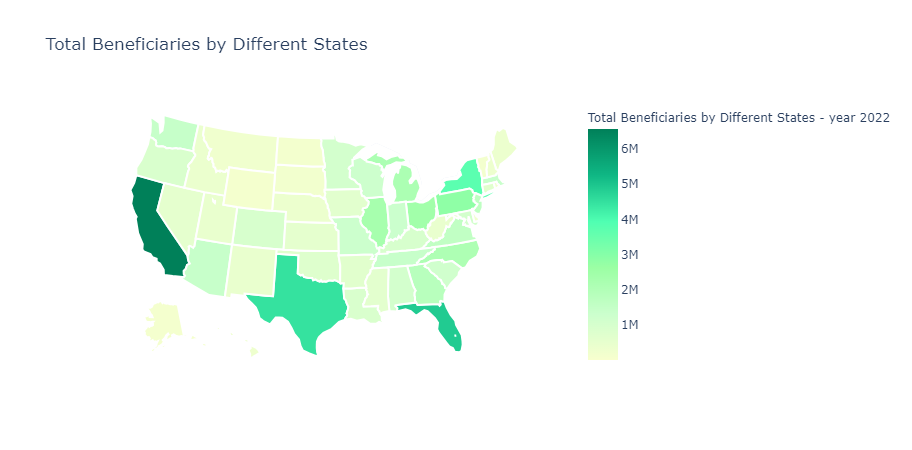

In [428]:
scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data_flt.state,
        z = data_flt.tot_benes,
        locationmode = 'USA-states',
        text = data_flt.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Total Beneficiaries by Different States - year 2022")
        )
       ]

layout = dict(
        title = 'Total Beneficiaries by Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [429]:
data = data_original
data = data[(data['TOT_BENES'] != 0) & (data['AGED_TOT_BENES'] != 0) & (data['DSBLD_TOT_BENES'] != 0) & (data['PRSCRPTN_DRUG_TOT_BENES'] != 0)]
options = [2021]
data= pd.DataFrame(data,columns = ['YEAR','BENE_GEO_LVL','BENE_STATE_ABRVTN','BENE_COUNTY_DESC', 'TOT_BENES','AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']) 
data_flt = data[(data['YEAR'].isin(options))]
data_flt = data_flt[(data_flt['BENE_COUNTY_DESC'] == 'Total')]
data_flt= data_flt[(data_flt['BENE_GEO_LVL'] == 'State')]
q1 = """ select tot_benes , BENE_STATE_ABRVTN from data_flt group by BENE_STATE_ABRVTN order by BENE_STATE_ABRVTN, year desc  """
data_flt = ps.sqldf("select tot_benes, state,rn from (select tot_benes , BENE_STATE_ABRVTN as state, RANK() OVER(partition by BENE_STATE_ABRVTN order by tot_benes ) as rn from data_flt order by tot_benes desc, rn) as temp where rn = 1  ")
#print(ps.sqldf(q1, locals()))
data_flt.head(30)

,tot_benes,state,rn
0,6433915,CA,1
1,4772844,FL,1
2,4350777,TX,1
3,3674284,NY,1
4,2786542,PA,1
5,2392516,OH,1
6,2268637,IL,1
7,2114000,MI,1
8,2064843,NC,1
9,1796348,GA,1


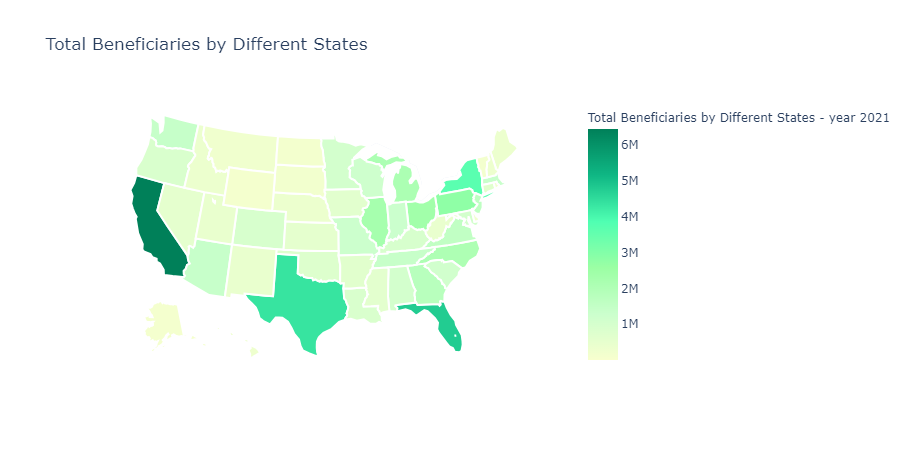

In [430]:
scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data_flt.state,
        z = data_flt.tot_benes,
        locationmode = 'USA-states',
        text = data_flt.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Total Beneficiaries by Different States - year 2021")
        )
       ]

layout = dict(
        title = 'Total Beneficiaries by Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [431]:
data= pd.DataFrame(data,columns = ['YEAR','BENE_GEO_LVL','BENE_STATE_ABRVTN','BENE_COUNTY_DESC', 'TOT_BENES','AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']) 

In [432]:
options = ['2022'] # Current year data
data=data_original
df1 = data[data['BENE_COUNTY_DESC'] == "Total"]
df_cy = df1[(df1['MONTH'] == "Year") & (df1['BENE_STATE_DESC'] != "National") & (df1['YEAR'].isin(options))]
##df_cy = df2[df2['YEAR'].str.contains('2022')]  #Current year
##df[df['Credit-Rating'].str.contains('Fair')] 
df_yearly_national = df1[(df1['MONTH'] == "Year") & (df1['BENE_STATE_DESC'] == "National") ]

In [433]:
#t=This dataset has only yearly counts for geographical level as National
row, col = df_yearly_national.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 10 rows and 26 columns.


In [434]:
df_yearly_national.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,234590.0,43526798,8664271,243169.0,8421102.0,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
43355,2014,Year,National,US,National,Total,,54013038,37790373,16222665,45216665,245705.0,44970960,8796373,249051.0,8547322.0,49073941,32876249,16197692,37720840,23437148,14283691,10313537,1051834.0,401548.0,25953921
86710,2015,Year,National,US,National,Total,,55496222,38025274,17470948,46630952,258350.0,46372603,8865269,254536.0,8610733.0,50414746,32969578,17445168,39505335,24092868,15412467,10643165,1077947.0,406304.0,27377918
130065,2016,Year,National,US,National,Total,,56981183,38610384,18370800,48143217,269019.0,47874199,8837966,256347.0,8581619.0,51743591,33393261,18350330,41203627,24831079,16372548,10915488,1086468.0,413970.0,28787701
173420,2017,Year,National,US,National,Total,,58457244,38667830,19789414,49678033,278642.0,49399391,8779211,258366.0,8520845.0,53008234,33242085,19766149,42728443,25243684,17484759,10856130,1014289.0,383811.0,30474213
216775,2018,Year,National,US,National,Total,,59989883,38665082,21324800,51303898,290243.0,51013655,8685985,261246.0,8424739.0,54349822,33052639,21297184,44249461,25563945,18685516,11374106,1103901.0,406367.0,31365087
260130,2019,Year,National,US,National,Total,,61514510,38577012,22937498,52991455,301798.0,52689658,8523055,262179.0,8260876.0,55653848,32758741,22895108,45827091,25583137,20243954,11555190,1094264.0,410245.0,32767391
303498,2020,Year,National,US,National,Total,,62840267,37776345,25063922,54531919,305080.0,54226839,8308348,255949.0,8052399.0,56966865,31934411,25032454,47413121,25171949,22241173,11655477,1112043.0,371211.0,34274390
346866,2021,Year,National,US,National,Total,,63892626,36356380,27536246,55851321,305227.0,55546095,8041304,248871.0,7792434.0,58041288,30537829,27503460,48818849,24164736,24654113,11711263,1108918.0,323250.0,35675418
390234,2022,Year,National,US,National,Total,,65116503,35288227,29828276,57362936,311070.0,57051865,7753567,244565.0,7509003.0,59108664,29327793,29780871,50295753,23400805,26894947,12231254,1050008.0,284815.0,36729676


In [435]:
numerical_columns = list(df_yearly_national.loc[:,['TOT_BENES', 'AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']])

In [436]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

In [437]:
df_yearly_national.head(20)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,234590.0,43526798,8664271,243169.0,8421102.0,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
43355,2014,Year,National,US,National,Total,,54013038,37790373,16222665,45216665,245705.0,44970960,8796373,249051.0,8547322.0,49073941,32876249,16197692,37720840,23437148,14283691,10313537,1051834.0,401548.0,25953921
86710,2015,Year,National,US,National,Total,,55496222,38025274,17470948,46630952,258350.0,46372603,8865269,254536.0,8610733.0,50414746,32969578,17445168,39505335,24092868,15412467,10643165,1077947.0,406304.0,27377918
130065,2016,Year,National,US,National,Total,,56981183,38610384,18370800,48143217,269019.0,47874199,8837966,256347.0,8581619.0,51743591,33393261,18350330,41203627,24831079,16372548,10915488,1086468.0,413970.0,28787701
173420,2017,Year,National,US,National,Total,,58457244,38667830,19789414,49678033,278642.0,49399391,8779211,258366.0,8520845.0,53008234,33242085,19766149,42728443,25243684,17484759,10856130,1014289.0,383811.0,30474213
216775,2018,Year,National,US,National,Total,,59989883,38665082,21324800,51303898,290243.0,51013655,8685985,261246.0,8424739.0,54349822,33052639,21297184,44249461,25563945,18685516,11374106,1103901.0,406367.0,31365087
260130,2019,Year,National,US,National,Total,,61514510,38577012,22937498,52991455,301798.0,52689658,8523055,262179.0,8260876.0,55653848,32758741,22895108,45827091,25583137,20243954,11555190,1094264.0,410245.0,32767391
303498,2020,Year,National,US,National,Total,,62840267,37776345,25063922,54531919,305080.0,54226839,8308348,255949.0,8052399.0,56966865,31934411,25032454,47413121,25171949,22241173,11655477,1112043.0,371211.0,34274390
346866,2021,Year,National,US,National,Total,,63892626,36356380,27536246,55851321,305227.0,55546095,8041304,248871.0,7792434.0,58041288,30537829,27503460,48818849,24164736,24654113,11711263,1108918.0,323250.0,35675418
390234,2022,Year,National,US,National,Total,,65116503,35288227,29828276,57362936,311070.0,57051865,7753567,244565.0,7509003.0,59108664,29327793,29780871,50295753,23400805,26894947,12231254,1050008.0,284815.0,36729676


<Axes: xlabel='YEAR', ylabel='TOT_BENES'>

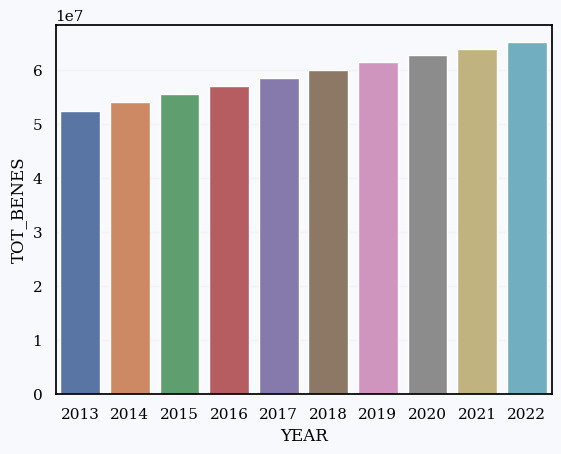

In [438]:
df_yearly_national['YEAR'] = pd.to_numeric(df_yearly_national['YEAR']).astype(int)
#sns.barplot(x=df3['YEAR'], y=df3['TOT_BENES'])
sns.barplot(x=df_yearly_national['YEAR'], y=df_yearly_national['TOT_BENES'])

In [439]:
#we're choosing the important columns that may give us meaningful results
imp_col = ['TOT_BENES','AGED_TOT_BENES','DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']
merged_details=df1
numerical_merged_cols = merged_details[imp_col]
numerical_merged_cols.describe()

,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES
count,"8,004.00","8,004.00","8,004.00"
mean,"2,050,967.16","1,758,986.62","291,980.55"
std,"7,715,317.96","6,630,868.78","1,094,593.35"
min,"1,836.00","1,501.00",335.00
25%,"285,351.50","243,330.50","35,468.00"
50%,"732,446.00","601,463.50","118,840.00"
75%,"1,334,662.25","1,138,092.25","204,125.00"
max,"66,338,178.00","58,759,355.00","9,095,609.00"


In [440]:
df_yearly_national.groupby('YEAR')['TOT_BENES'].sum()


YEAR
2013    52425659
2014    54013038
2015    55496222
2016    56981183
2017    58457244
2018    59989883
2019    61514510
2020    62840267
2021    63892626
2022    65116503
Name: TOT_BENES, dtype: int64